In [15]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 12, 31)

df_sec = web.get_data_yahoo("005930.KS", start, end)
df_kospi = web.get_data_yahoo('^KS11', start, end)
df_sec

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13134.010742
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13345.065430
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13653.530273
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13198.952148
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13328.830078
...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,71766.921875
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75554.351562
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76428.375000


In [16]:
df_kospi["ln_diff"] = (np.log(df_kospi["Close"]) - np.log(df_kospi["Close"]).shift(1))*100
df_sec["ln_diff"] = (np.log(df_sec["Close"]) - np.log(df_sec["Close"]).shift(1))*100

In [18]:
df_sec

,High,Low,Open,Close,Volume,Adj Close,ln_diff
Date,,,,,,,
2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,13134.010742,NaN
2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13345.065430,1.594148
2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13653.530273,2.285126
2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,13198.952148,-3.386055
2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13328.830078,0.979200
...,...,...,...,...,...,...,...
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,71766.921875,2.188870
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,75554.351562,5.142860
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,76428.375000,1.150172


In [126]:
import statsmodels.api as sm


In [127]:
SE = df_sec.iloc[1:1000, 6]
KOSPI = df_kospi.iloc[1:1000, 6]

In [128]:
SE.isnull()

Date
2010-01-05    False
2010-01-06    False
2010-01-07    False
2010-01-08    False
2010-01-11    False
              ...  
2014-01-03    False
2014-01-06    False
2014-01-07    False
2014-01-08    False
2014-01-09    False
Name: ln_diff, Length: 999, dtype: bool

In [129]:
SE.shape

(999,)

In [130]:
SE.describe()

count    999.000000
mean       0.045536
std        1.825820
min       -7.743174
25%       -1.069824
50%        0.000000
75%        1.102520
max        6.739797
Name: ln_diff, dtype: float64

In [142]:
print("삼성변화율:" ,SE.describe() , " \n 코스피변화율:" , KOSPI.describe())

삼성변화율: count    999.000000
mean       0.045536
std        1.825820
min       -7.743174
25%       -1.069824
50%        0.000000
75%        1.102520
max        6.739797
Name: ln_diff, dtype: float64  
 코스피변화율: count    999.000000
mean       0.013762
std        1.138616
min       -6.420246
25%       -0.554472
50%        0.021698
75%        0.669270
max        4.900019
Name: ln_diff, dtype: float64


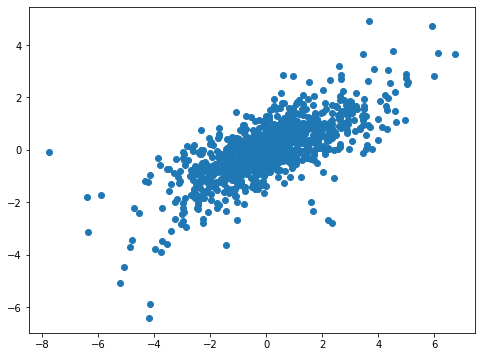

In [143]:

plt.figure(figsize  = (8,6))
plt.scatter(SE, KOSPI)
plt.show()

In [131]:
model = sm.OLS(KOSPI, SE).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ln_diff   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              1100.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                   3.28e-163
Time:                        13:45:25   Log-Likelihood:                         -1175.6
No. Observations:                 999   AIC:                                      2353.
Df Residuals:                     998   BIC:                                      2358.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_diff        0.4515      0.014     33.168      0.000       0.425       0.478
==============================================================================
Omnibus:                      129.030   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.499
Skew:                          -0.530   Prob(JB):                    6.45e-121
Kurtosis:                       6.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
SE_CLOSE = df_sec.iloc[1:1000, 3]
KOSPI_CLOSE= df_kospi.iloc[1:1000, 3]

In [134]:
mean_se = SE_CLOSE.mean()
mean_ko = KOSPI_CLOSE.mean()

In [135]:
SE_CLOSE = SE_CLOSE.fillna(mean_se)
KOSPI_CLOSE = KOSPI_CLOSE.fillna(mean_ko)

In [141]:
print("삼성종가:" ,SE_CLOSE.describe() , " \n 코스피종가:" , KOSPI_CLOSE.describe())

삼성종가: count      999.000000
mean     21953.053053
std       5404.691366
min      13600.000000
25%      16660.000000
50%      21160.000000
75%      26800.000000
max      31520.000000
Name: Close, dtype: float64  
 코스피종가: count     999.000000
mean     1909.822110
std       134.114360
min      1552.790039
25%      1826.010010
50%      1927.229980
75%      2001.434998
max      2228.959961
Name: Close, dtype: float64


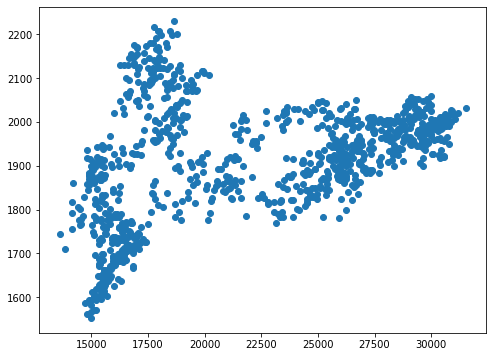

In [144]:
plt.figure(figsize  = (8,6))
plt.scatter(SE_CLOSE, KOSPI_CLOSE)
plt.show()

In [137]:
model = sm.OLS(KOSPI_CLOSE, SE_CLOSE).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          1.951e+04
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                        0.00
Time:                        13:47:48   Log-Likelihood:                         -7457.2
No. Observations:                 999   AIC:                                  1.492e+04
Df Residuals:                     998   BIC:                                  1.492e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close          0.0826      0.001    139.695      0.000       0.081       0.084
==============================================================================
Omnibus:                     8095.589   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.673
Skew:                          -0.069   Prob(JB):                     2.04e-20
Kurtosis:                       1.531   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model_all = sm.OLS(KOSPI_ALL, SE_ALL).fit()
model_all.summary()

MissingDataError: exog contains inf or nans

In [125]:
model_all = sm.OLS(SE , KOSPI ).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                ln_diff   R-squared (uncentered):                   0.524
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              1100.
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                   3.28e-163
Time:                        13:45:01   Log-Likelihood:                         -1647.6
No. Observations:                 999   AIC:                                      3297.
Df Residuals:                     998   BIC:                                      3302.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_diff        1.1614      0.035     33.168      0.000       1.093       1.230
==============================================================================
Omnibus:                       52.956   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.830
Skew:                           0.048   Prob(JB):                     7.32e-41
Kurtosis:                       5.105   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
SE = df_SE.iloc[1:, 5]
KOSPI = df_KOSPI.iloc[1:, 5]
plt.figure(figsize  = (8,6))
plt.scatter(SE, KOSPI)
plt.show()